# IS 432 Final Project

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
from sklearn import linear_model
%matplotlib inline

In [2]:
df=pd.read_csv("heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# 1. Simple Linear Regression: 

In [3]:
msk = np.random.rand(len(df)) < 0.75
train = df[msk]
test = df[~msk]

<function matplotlib.pyplot.show(close=None, block=None)>

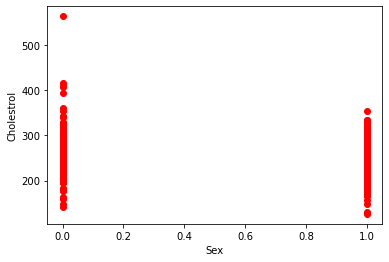

In [4]:
x=df[["sex"]]
y=df[["chol"]]
plt.scatter(x,y, color="red")
plt.xlabel("Sex")
plt.ylabel("Cholestrol")
plt.show

In [5]:
simp = linear_model.LinearRegression()
train_x = np.asanyarray(train[['sex']])
train_y = np.asanyarray(train[['chol']])
simp.fit (train_x, train_y)
print ('Coefficients: ', simp.coef_)
print ('Intercept: ',simp.intercept_)

Coefficients:  [[-20.90955285]]
Intercept:  [258.95833333]


 y = (-30.21)x + 265.42 we have taken age from index 0 i.e sex=1 then y = (-30.21)x1 + 265.42 = 235.21

We have examined the y value, which is the cholestrol value for row 0 and which was projected to be higher than it was initially. We have also reviewed the x value, which is the cholesterol value for row 0.

It projected data from the aforementioned model of test data, which was the cholestrol value from row 0 and which was anticipated to be bigger than it was initially predicted to be. The actual data was 233, whereas the predicted data was 235.21, which was not a significant difference, but was somewhat higher than the actual data. 

# 2. Multiple Regression: 

In [6]:
multi = linear_model.LinearRegression()
x = np.asanyarray(train[['age','sex','cp','trestbps']])
y = np.asanyarray(train[['chol']])
multi.fit (x, y)
print ('Coefficients: ', multi.coef_)
print ('Intercept: ', multi.intercept_)

Coefficients:  [[  0.93427792 -18.98449721  -3.74446889   0.0736566 ]]
Intercept:  [201.16028112]


 y = 1.005x + (-20.69)z + (-3.9)w + (0.08)a + 197.9 .For row 0 we will get y=  1.005*63 + (-20.69)*1 + (-3.9)*3 + (0.08)*145 + 197.9 = 240.425

We have examined the y value, which is the cholestrol value for row 0 and which was projected to be higher than it was initially. 

It projected data from the aforementioned model of test data, which was the cholestrol value from row 0 and which was anticipated to be bigger than it was initially predicted to be. The actual data was 233, whereas the predicted data was 240.425, which was a significant difference thus much higher than the actual data. Compared to predicated data of simple regression , multiple regression data was much greater. Thus i feel like simple regression model seems to best fit data. 

# 3. K-nearest neighbors

In [7]:
X = df[['age','sex','cp','oldpeak']] .values 
X[0:5]

array([[63. ,  1. ,  3. ,  2.3],
       [37. ,  1. ,  2. ,  3.5],
       [41. ,  0. ,  1. ,  1.4],
       [56. ,  1. ,  1. ,  0.8],
       [57. ,  0. ,  0. ,  0.6]])

In [8]:
y = df['chol'].values
y[0:5]

array([233, 250, 204, 236, 354])

In [9]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 0.9521966 ,  0.68100522,  1.97312292,  1.08733806],
       [-1.91531289,  0.68100522,  1.00257707,  2.12257273],
       [-1.47415758, -1.46841752,  0.03203122,  0.31091206],
       [ 0.18017482,  0.68100522,  0.03203122, -0.20670527],
       [ 0.29046364, -1.46841752, -0.93851463, -0.37924438]])

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (242, 4) (242,)
Test set: (61, 4) (61,)


In [11]:
from sklearn.neighbors import KNeighborsClassifier
k = 3
#Train Model and Predict
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=3)

In [12]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([197, 269, 303, 213, 213])

In [13]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.359504132231405
Test set Accuracy:  0.0


In [14]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    #Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01639344])

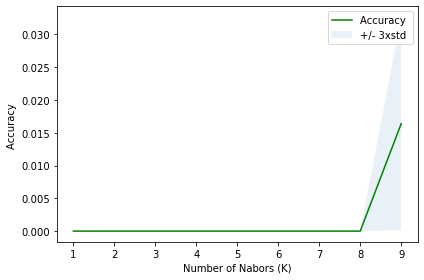

In [15]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

According to the graph, the value of k is more accurate when the number is nine. Using the value of k as 9, we get an accuracy of 0.020. I would pick the vaule of k = 9 since I believe this would be the most accurate representation of the vaule.

# 4. Reflection on the class

<h2>a. Explain in your own words why you think data analytics is important in the 21st century.<h2/>
    <h3> Through data analysis, we may predict future events and define the characteristics of a data set while also summarizing the information contained within it. When data analysis is combined with visual analysis, we are able to create a complete framework of information. We are able to foresee the future based on the data we have collected and analyzed. When making predictions about the future, it takes use of descriptive analysis. Through technical improvements in analysis and machine learning, we are able to get insight into the future and make predictions about it. Enterprises must be able to think critically about the nature of data and comprehend the analysis in its entirety. Finding anomalous patterns in the data is essential for identifying problems with our model's performance, and we must look for these patterns in order to identify problems<h3/>

<h2>b. In your opinion, what was the most important thing you learned this term. Why?  Will you be able to use it in the future?<h2/>
    <h3>The most significant thing I learnt this term and will be able to use it in the future, in my view, are problem-solving abilities, which are in high demand due to the increasing amount of data available. At its core, analytics is about finding solutions to problems. The difficulties, however, are on a far wider scale than most of us are used to, affecting whole organizations, as well as the employees and consumers that they provide. Not only is it beneficial in the professional sphere, but it is also beneficial in daily life. The capacity to think critically and approach issues in the proper manner is a talent that can be used at any time.<h3/>

<h2>c. For your learning style, what was most and least instructrutive about this class.  In other words, what helped you learn the most and what helped you learn the least. <h2>
    <h3> In my opinion, this was an extremely interesting class, but because of my unique situation of being on the other side of the world, which prevented me from participating in in-person classes, I was unable to connect with and contribute to the class as much as I would have liked. However, because of the well-described nature of the modules every week, I still learn significantly more than I did before taking the class.<h3/>

<h2>d. What would you have wanted to learn more about?  Why would you want to learn more about that?  How could it help you in your future. <h2/>
    <h3> In addition to all we've learned in this class. I would have liked to have learnt more about the day-to-day working environment in the data analytics industry. I would have liked to have seen a real-life project on data analytics and how different tools and techniques work in practice and in opposition to one another. What roles may the skills learned in this class be utilized to fill, and how could the real-world applications of these philosophies be employed? In the end, there is little question that data analytics will play a significant role in the operations of businesses in the future. Understanding real-world project environments might have put me one step ahead of the competition. Learning analytics today gives a road to success, as well as transferable abilities that can be used in any aspect of life. <h3/>

# 5. Panel Discussion 

<h2> a. Give a general summary of the panel discussion. <h2/>
    <h3> A panel discussion was held on December 3rd, 2021, during the 9th week of our winter semester, with three sets of participants. The members of the panel who are specialists in the area of data. Select students who pose questions to the panelists in advance. In addition, the moderator who started the debate, asked questions, synthesized, and summarized the major elements of the topic was our class instructor.Members of the panel had backgrounds in biology , psychology and worked with cell behavior, cell functions, and data processing. With the assessment stratification program and childcare analytics, they worked by running datasets to surveys, statistical models. They utilized Python, SaaS, SQL, and R programming languages and spent relatively little time on data analytics, but a lot of effort cleaning up the dat  onversion. <h3/>


<h2>b. What question did you prepare in advance?  What was the answer to yourquestion?<h2/>
    <h3>Some of the inquiries I had were, for example, what type of working environment they had as a data analyst in their professional role. I was curious in how the hiring process for a data analyst works, as well as how frequently students use what they've learned in class as they prepare for this role. I received answers to all of my queries as a result of this panel discussion. I learned that data analysts spend a disproportionate amount of time cleaning data rather than employing data analytics technologies in their professional lives. People do utilize programming language for analysis, as shown by their analysis and demonstration. Data conversion takes more time, whereas simple analysis such as percentages and standard deviations were common in this working environment, whereas the everyday environment consists of meetings, emails, and team stand ups, and the tools we learned in class are only done upon request or at the end of a report using the dashboard, respectively. Also discovered that the hiring process may be done in a variety of ways, since some were contractors and others were full-time employees, and that the kind of data they were working with had a significant impact on the process.<h3/>

<h2> c. What was the most valuable thing you learned from the panelist? <h2/>
    <h3>Some of the most essential things I learned from the panelists were that no matter what your educational background is, you can educate yourself with various skills in this data analytics field and continue your career if you can critically think. Using data to discover answers to your concerns requires first figuring out what questions to ask in the first place, which may be a difficult task on sometimes. To be a successful analyst, you must be able to think critically. An analyst's job is to discover and synthesize connections that are not always immediately obvious. While this talent is intrinsic to some level, there are a number of strategies you may use to assist develop your critical thinking abilities in order to succeed in life. For example, asking oneself fundamental questions regarding the problem at hand might help you keep grounded while looking for a solution. It is also crucial to remember to think for yourself rather than depending on what is already known to be true. These abilities, which include not just technical abilities but also the ability to communicate the results of your analytical conclusion, are quite valuable. Most people don't care how the work is done; they're more concerned with getting a basic outcome that they can comprehend.<h3/>